# Index Day/Night - Run in python
This only needs to be done once

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import cmocean
import warnings
from matplotlib import rcParams
from mpl_toolkits.axes_grid1 import make_axes_locatable
warnings.filterwarnings('ignore')
#Pickled acoustic data
df1022 = pd.read_pickle('processingFiles/df1022.pkl')
df1023 = pd.read_pickle('processingFiles/df1023.pkl')
dfMLS1 = pd.read_pickle('processingFiles/dfMLS1.pkl')
dfMLS2 = pd.read_pickle('processingFiles/dfMLS2.pkl')
dfMLS3 = pd.read_pickle('processingFiles/dfMLS3.pkl')
dfMLS4 = pd.read_pickle('processingFiles/dfMLS4.pkl')
# ENV data files
dfEnv1022 = pd.read_csv('processingFiles/Env1022.csv')
dfEnv1022.dtime = pd.to_datetime(dfEnv1022.dtime)
dfEnv1023 = pd.read_csv('processingFiles/Env1023.csv')
dfEnv1023.dtime = pd.to_datetime(dfEnv1023.dtime)
def combineEnvAcoustic(dfEnv, dfAcoustic):
    dfEnv.dtime = pd.to_datetime(dfEnv.dtime)
    dfEnv = dfEnv.sort_values('dtime')
    dfEnv = dfEnv.set_index('dtime')

    dfAcoustic = dfAcoustic.sort_values('datetime')
    dfAcoustic = dfAcoustic.set_index('datetime')

    df = dfEnv.reindex(dfAcoustic.index, method='nearest')
    df = df.merge(dfAcoustic,on='datetime')
    return df
df1022All= combineEnvAcoustic(dfEnv1022, df1022)
df1023All= combineEnvAcoustic(dfEnv1023, df1023)
dfSurvey1All = df1022All[(df1022All.index > '07-20-2018') & (df1022All.index < '08-21-2018') ]
dfSurvey1All.name = 'First Complete Survey'

df1023CS2 = df1023All[(df1023All.index > '08-24-2018 15:00:00') & (df1023All.index < '09-07-2018')]
df1022CS2 = df1022All[(df1022All.index > '08-25-2018') & (df1022All.index < '09-11-2018 22:00:00') ]
dfSurvey2All = pd.concat([df1023CS2, df1022CS2])
dfSurvey2All.name = 'Second Complete Survey'
dfEnvMLS1 = dfEnv1023[(dfEnv1023.dtime > '07-20-2018 20:00:00') & (dfEnv1023.dtime < '08-04-2018 00:00:00')]
dfEnvMLS1.name = 'MLS-1'
dfEnvMLS2 = dfEnv1022[(dfEnv1022.dtime > '07-23-2018 20:00:00') & (dfEnv1022.dtime < '08-13-2018 00:00:00')]
dfEnvMLS2.name = 'MLS-2'
dfEnvMLS3 = pd.concat([dfEnv1023[(dfEnv1023.dtime > '08-13-2018 15:00:00') & (dfEnv1023.dtime < '08-16-2018 20:00:00')], dfEnv1022[(dfEnv1022.dtime > '08-22-2018 00:00:00') & (dfEnv1022.dtime < '08-29-2018 00:00:00')]])
dfEnvMLS3.name = 'MLS-3'
dfEnvMLS4 = dfEnv1023[(dfEnv1023.dtime > '08-30-2018 20:00:00') & (dfEnv1023.dtime < '09-11-2018 17:00:00')]
dfEnvMLS4.name = 'MLS-4'


df1022All= combineEnvAcoustic(dfEnvMLS1, dfMLS1)
test = df1022All.resample('H').mean()
test['day'] =  test.par > 10
test['survey'] = [1 for i in range(len(test))]
csvMLS1 = test[['mwd','day','survey']]
csvMLS1['hour'] = [i for i in range(len(csvMLS1))]
df1022All= combineEnvAcoustic(dfEnvMLS2, dfMLS2)
test = df1022All.resample('H').mean()
test['day'] =  test.par > 10
test['survey'] = [2 for i in range(len(test))]
csvMLS2 = test[['mwd','day','survey']]
csvMLS2['hour'] = [i for i in range(len(csvMLS2))]
df1022All= combineEnvAcoustic(dfEnvMLS3, dfMLS3)
test = df1022All.resample('H').mean()
test['day'] =  test.par > 10
test['survey'] = [3 for i in range(len(test))]
csvMLS3 = test[['mwd','day','survey']]
csvMLS3['hour'] = [i for i in range(len(csvMLS3))]
df1022All= combineEnvAcoustic(dfEnvMLS4, dfMLS4)
test = df1022All.resample('H').mean()
test['day'] =  test.par > 10
test['survey'] = [4 for i in range(len(test))]
csvMLS4 = test[['mwd','day','survey']]
csvMLS4['hour'] = [i for i in range(len(csvMLS4))]
                   
csvAll = pd.concat([csvMLS1,csvMLS2,csvMLS3,csvMLS4])
csvAll['julian']= csvAll.index.to_julian_date() 
csvAll.julian = csvAll.julian-pd.to_datetime('2017-12-31').to_julian_date()
csvAll.day = csvAll.day.astype(int)
csvAll.julian = csvAll.julian.astype(float)
csvAll.to_csv('processingFiles/daynight.csv')

# Switch to R

In [2]:
df<-read.csv('processingFiles/daynight.csv')
df <- df[complete.cases(df),]
library(nlme)
library(mgcv)
library(dplyr)
df2 = distinct(df,julian,.keep_all=TRUE)
mod1<-gls(mwd ~ day*julian, data=df2, correl = corCAR1(form = ~julian)) # whether I use the survey as cetegorical or continuous
summary(mod1)

Warning message:
"package 'nlme' was built under R version 3.6.3"Warning message:
"package 'mgcv' was built under R version 3.6.3"This is mgcv 1.8-32. For overview type 'help("mgcv-package")'.
Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following object is masked from 'package:nlme':

    collapse

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Generalized least squares fit by REML
  Model: mwd ~ day * julian 
  Data: df2 
      AIC      BIC   logLik
  5067.24 5096.973 -2527.62

Correlation Structure: Continuous AR(1)
 Formula: ~julian 
 Parameter estimate(s):
      Phi 
0.1060106 

Coefficients:
                 Value Std.Error   t-value p-value
(Intercept) -14.509072 12.712467 -1.141326  0.2540
day          -9.126326  4.196104 -2.174952  0.0299
julian        0.154855  0.055644  2.782981  0.0055
day:julian    0.045896  0.018375  2.497812  0.0126

 Correlation: 
           (Intr) day    julian
day        -0.247              
julian     -0.997  0.244       
day:julian  0.244 -0.997 -0.242

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-2.29881488 -0.65086763  0.04191786  0.61434303  3.21111194 

Residual standard error: 6.41467 
Degrees of freedom: 1053 total; 1049 residual

# Spatial model - back to python
This only needs to be done once to make csv versions of the dataframes for use in R.

In [1]:
import pandas as pd
df = pd.read_pickle('processingFiles/dfMLS1Grid.pkl')
df.to_csv('processingFiles/MLS1Grid.csv')
df = pd.read_pickle('processingFiles/dfMLS2Grid.pkl')
df.to_csv('processingFiles/MLS2Grid.csv')
df = pd.read_pickle('processingFiles/dfMLS3Grid.pkl')
df.to_csv('processingFiles/MLS3Grid.csv')
df = pd.read_pickle('processingFiles/dfMLS4Grid.pkl')
df.to_csv('processingFiles/MLS4Grid.csv')
df = pd.read_pickle('processingFiles/dfS1Grid.pkl')
df.to_csv('processingFiles/S1Grid.csv')
df = pd.read_pickle('processingFiles/dfS2Grid.pkl')
df.to_csv('processingFiles/S2Grid.csv')


## R part

In [1]:
library(nlme)
library(mgcv)
library(mapproj)
library(sp)
# Read in all of the csv files and combine into small survey and big survey dataframes
df1<-read.csv('processingFiles/MLS1Grid.csv')
df1$survey=factor(1)
df2<-read.csv('processingFiles/MLS2Grid.csv')
df2$survey=factor(2)
df3<-read.csv('processingFiles/MLS3Grid.csv')
df3$survey=factor(3)
df4<-read.csv('processingFiles/MLS4Grid.csv')
df4$survey=factor(4)
dfAllSmall <- rbind(df1, df2,df3,df4)
df1<-read.csv('processingFiles/S1Grid.csv')
df1$survey=factor(1)
df2<-read.csv('processingFiles/S2Grid.csv')
df2$survey=factor(2)
dfAllLarge <- rbind(df1, df2)

Warning message:
"package 'nlme' was built under R version 3.6.3"Warning message:
"package 'mgcv' was built under R version 3.6.3"This is mgcv 1.8-32. For overview type 'help("mgcv-package")'.
Warning message:
"package 'mapproj' was built under R version 3.6.3"Loading required package: maps
Warning message:
"package 'sp' was built under R version 3.6.3"

Generalized least squares fit by REML
  Model: nasc ~ survey 
  Data: dfAll 
       AIC      BIC    logLik
  2742.455 2759.214 -1366.227

Correlation Structure: Gaussian spatial correlation
 Formula: ~x + y | survey 
 Parameter estimate(s):
      range      nugget 
0.006317752 0.183455260 

Coefficients:
                Value Std.Error  t-value p-value
(Intercept) 144.31036  37.37241 3.861414  0.0001
survey2      44.68904  50.54258 0.884186  0.3776

 Correlation: 
        (Intr)
survey2 -0.739

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-0.8960460 -0.6296562 -0.3677490  0.4097582  5.2994832 

Residual standard error: 202.1092 
Degrees of freedom: 213 total; 211 residual

,numDF,F-value,p-value
,<int>,<dbl>,<dbl>
(Intercept),1,44.9795366,1.794454e-10
survey,1,0.7817846,3.776023e-01


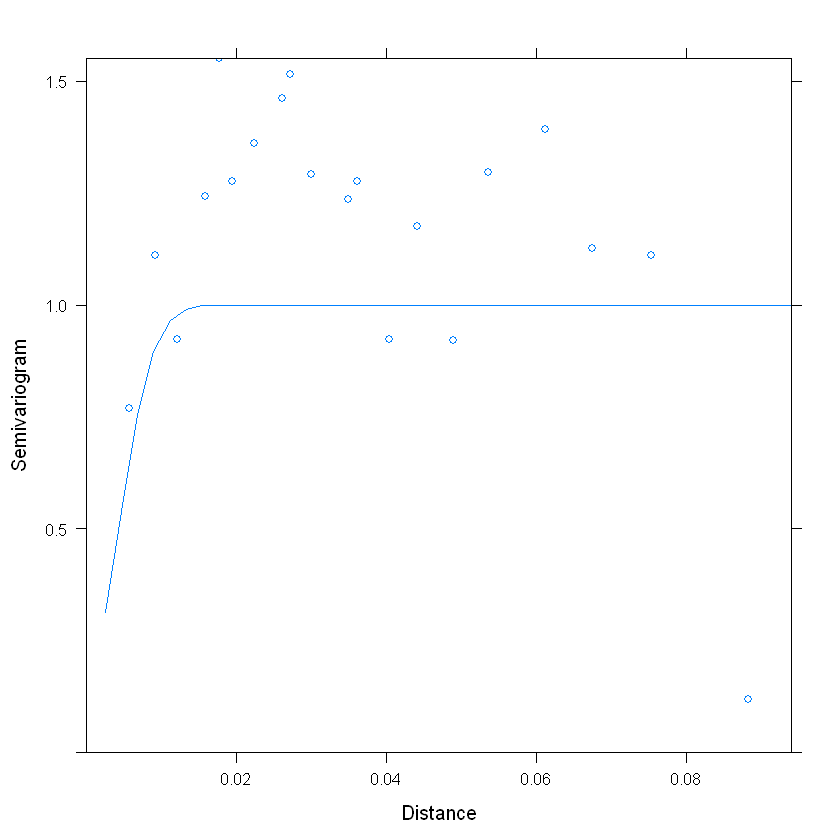

In [3]:
# Let's fit a model for the large scale survey
dfAll <- dfAllLarge
f.lm <- lm(nasc ~ survey, data=dfAll)
x <- mapproject(dfAll$lonC, dfAll$latC, "albers", param=c(min(dfAll$latC), max(dfAll$latC)))
dfAll$x <- x$x
dfAll$y <- x$y
f.Gaus <-gls(nasc ~ survey, data=dfAll, correl=corGaus(form= ~ x+y | survey, nugget=T))
summary(f.Gaus)
plot(Variogram(f.Gaus))
anova(f.Gaus)

Generalized least squares fit by REML
  Model: nasc ~ survey 
  Data: dfAll 
       AIC      BIC  logLik
  2753.799 2776.992 -1369.9

Correlation Structure: Gaussian spatial correlation
 Formula: ~x + y | survey 
 Parameter estimate(s):
      range      nugget 
0.004882934 0.133734959 

Coefficients:
                Value Std.Error   t-value p-value
(Intercept) 197.59450  53.76396  3.675222  0.0003
survey2     -20.22359  76.68587 -0.263720  0.7923
survey3      84.01316  79.94474  1.050890  0.2946
survey4     172.43467  80.34524  2.146172  0.0330

 Correlation: 
        (Intr) survy2 survy3
survey2 -0.701              
survey3 -0.673  0.471       
survey4 -0.669  0.469  0.450

Standardized residuals:
       Min         Q1        Med         Q3        Max 
-1.3105109 -0.6045354 -0.2688712  0.5383665  3.4828091 

Residual standard error: 255.5537 
Degrees of freedom: 207 total; 203 residual

,numDF,F-value,p-value
,<int>,<dbl>,<dbl>
(Intercept),1,78.051057,4.782569e-16
survey,3,2.347006,7.387992e-02


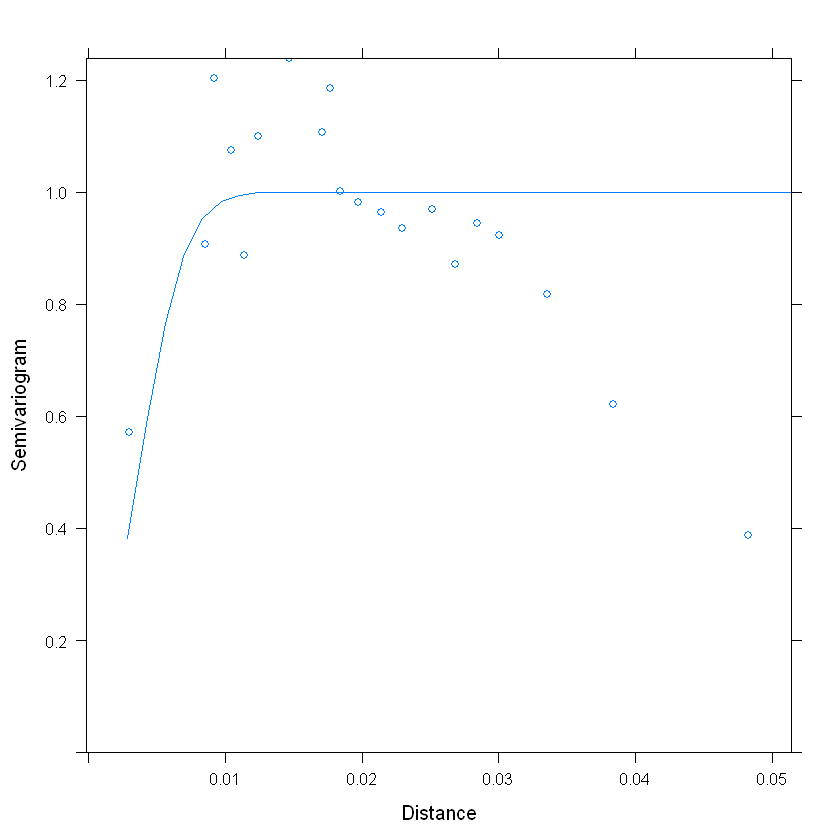

In [6]:
# now we can fit the model for the small scale survey
dfAll <- dfAllSmall
f.lm <- lm(nasc ~ survey, data=dfAll)
x <- mapproject(dfAll$lonC, dfAll$latC, "albers", param=c(min(dfAll$latC), max(dfAll$latC)))
dfAll$x <- x$x
dfAll$y <- x$y
f.Gaus <-gls(nasc ~ survey, data=dfAll, correl=corGaus(form= ~ x+y | survey, nugget=T))
summary(f.Gaus)
plot(Variogram(f.Gaus))
anova(f.Gaus)

# Target Strength
As a function of time

In [34]:
# Start with the basic linear model
library(nlme)
library(mgcv)
library(dplyr)
df<-read.csv('processingFiles/targets6h.csv') 
mdl <- lm(y ~x,data=df)
summary(mdl)


Call:
lm(formula = y ~ x, data = df)

Residuals:
       Min         1Q     Median         3Q        Max 
-1.853e-06 -4.753e-07 -8.960e-08  3.399e-07  3.768e-06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -7.643e-06  1.197e-06  -6.387 3.89e-09 ***
x            4.537e-08  5.334e-09   8.505 8.55e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 9.303e-07 on 113 degrees of freedom
  (11 observations deleted due to missingness)
Multiple R-squared:  0.3903,	Adjusted R-squared:  0.3849 
F-statistic: 72.34 on 1 and 113 DF,  p-value: 8.555e-14


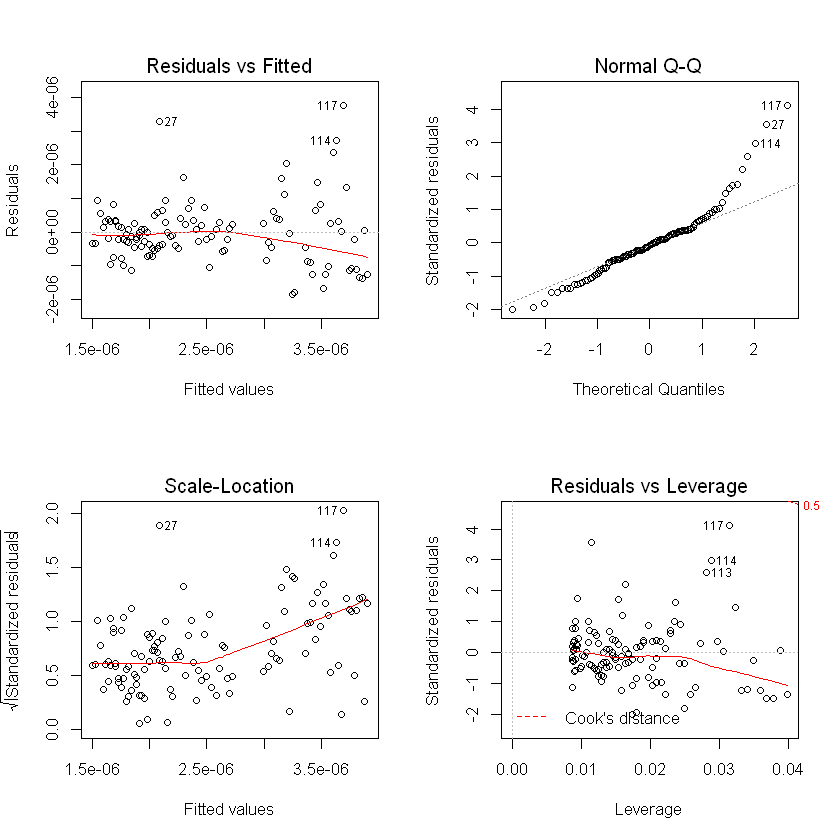

In [35]:
# Then check the residuals
par(mfrow=c(2,2))
plot(mdl)

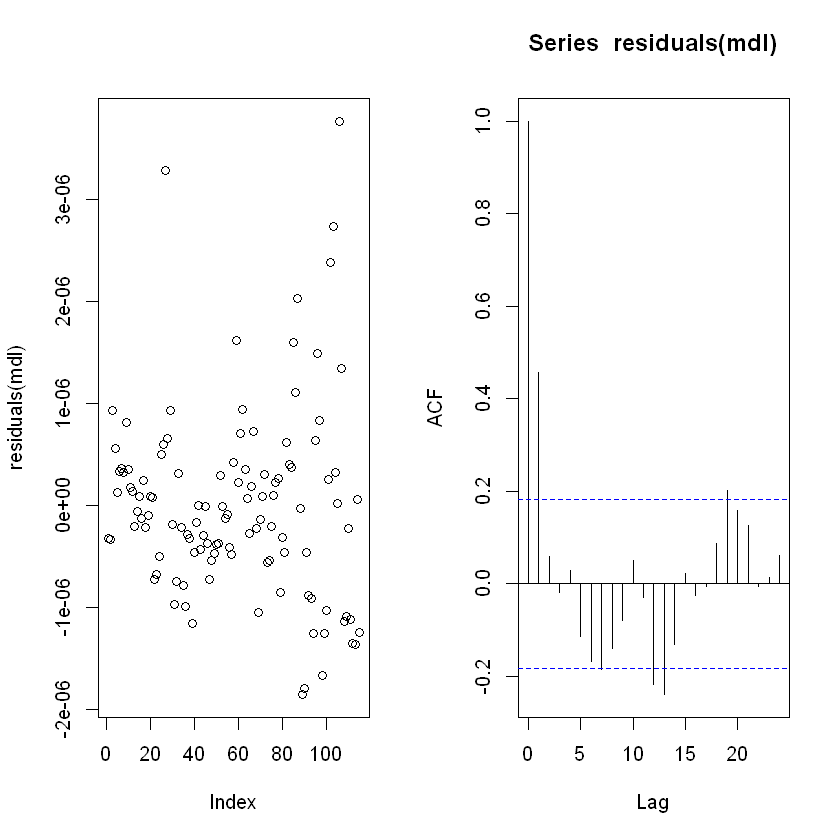

In [36]:
# and finaly take a look at potential autocorrelation effects
par(mfrow=c(1,2))
plot(residuals(mdl))
acf(residuals(mdl), lag.max=24)

In [33]:
# The temporal autocorrelation doesn't seem signifiacnt, but here's the model
df <- df[complete.cases(df),]
df2 = distinct(df,x,.keep_all=TRUE)
mod1<-gls(y ~ x, data=df2, correl = corCAR1(form = ~x)) 
summary(mod1)

Generalized least squares fit by REML
  Model: y ~ x 
  Data: df2 
       AIC       BIC   logLik
  -4328.75 -4316.023 2168.375

Correlation Structure: Continuous AR(1)
 Formula: ~x 
 Parameter estimate(s):
       Phi 
0.08329005 

Coefficients:
                    Value    Std.Error   t-value p-value
(Intercept) -8.508546e-06 2.623003e-06 -3.243819  0.0014
x            5.023700e-08 1.150490e-08  4.366544  0.0000

 Correlation: 
  (Intr)
x -0.997

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.80985095 -0.47522609 -0.07708599  0.30706711  6.91573007 

Residual standard error: 1.410608e-06 
Degrees of freedom: 180 total; 178 residual

### Target strength

Spatial version using gridded data

In [68]:
library(nlme)
library(mgcv)
library(mapproj)
library(sp)
# Read in all of the csv files and combine into small survey and big survey dataframes
df1<-read.csv('processingFiles/gridTS1.csv')
df1$survey=factor(1)
df2<-read.csv('processingFiles/gridTS2.csv')
df2$survey=factor(2)
df3<-read.csv('processingFiles/gridTS3.csv')
df3$survey=factor(3)
df4<-read.csv('processingFiles/gridTS4.csv')
df4$survey=factor(4)
dfAllSmall <- rbind(df1, df2,df3,df4)

Generalized least squares fit by REML
  Model: ts ~ survey 
  Data: dfAll 
        AIC       BIC   logLik
  -3736.011 -3714.662 1875.005

Correlation Structure: Gaussian spatial correlation
 Formula: ~x + y | survey 
 Parameter estimate(s):
       range       nugget 
2.427326e-03 3.174721e-07 

Coefficients:
                   Value    Std.Error  t-value p-value
(Intercept) 1.971077e-06 2.670117e-07 7.381987  0.0000
survey2     2.988188e-07 3.776115e-07 0.791339  0.4299
survey3     8.959633e-07 3.776115e-07 2.372712  0.0189
survey4     2.417314e-06 3.776115e-07 6.401589  0.0000

 Correlation: 
        (Intr) survy2 survy3
survey2 -0.707              
survey3 -0.707  0.500       
survey4 -0.707  0.500  0.500

Standardized residuals:
        Min          Q1         Med          Q3         Max 
-1.72407795 -0.47611423 -0.08770083  0.32899287  6.75361780 

Residual standard error: 1.434059e-06 
Degrees of freedom: 160 total; 156 residual

,numDF,F-value,p-value
,<int>,<dbl>,<dbl>
(Intercept),1,463.45061,1.425477e-48
survey,3,16.24064,3.092523e-09


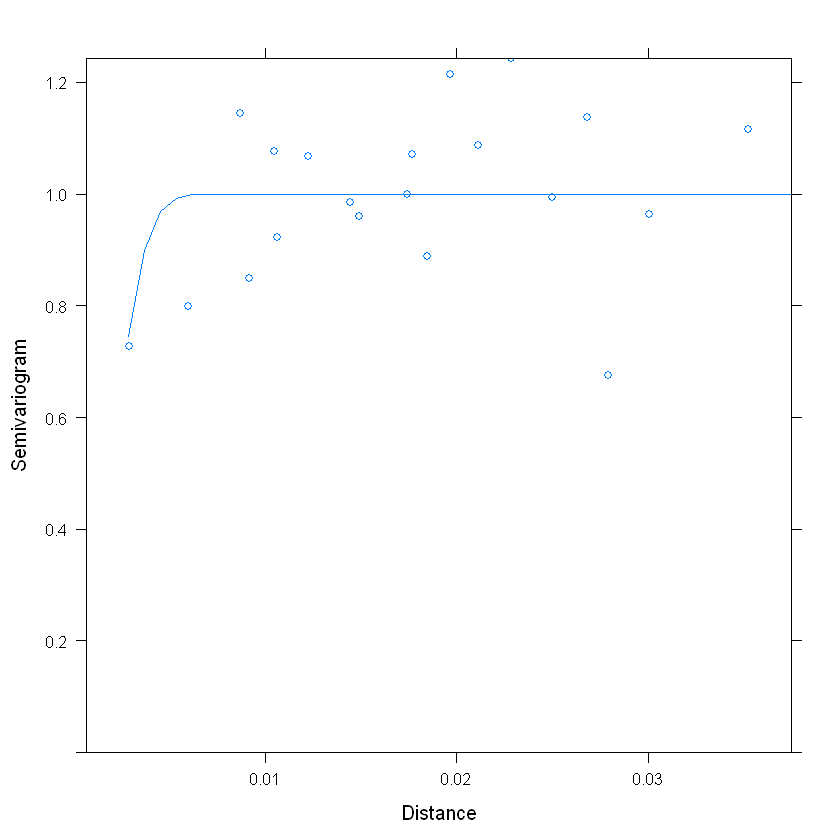

In [86]:
dfAll <- dfAllSmall
f.lm <- lm(ts ~ survey, data=dfAll)
x <- mapproject(dfAll$lonC, dfAll$latC, "albers", param=c(min(dfAll$latC), max(dfAll$latC)))
dfAll$x <- x$x
dfAll$y <- x$y
f.Gaus <-gls(ts ~ survey, data=dfAll, correl=corGaus(form= ~ x+y | survey, nugget=T))
summary(f.Gaus)
plot(Variogram(f.Gaus))
anova(f.Gaus)

In [58]:
a = summary(f.Gaus)
a$tTable

,Value,Std.Error,t-value,p-value
(Intercept),1.971077e-06,2.670117e-07,7.3819871,8.742716e-12
survey2,2.988188e-07,3.776115e-07,0.7913392,4.299476e-01
survey3,8.959633e-07,3.776115e-07,2.3727116,1.887660e-02
survey4,2.417314e-06,3.776115e-07,6.4015890,1.715673e-09


In [73]:
10*log10(a$tTable[1]-a$tTable[5])
10*log10(a$tTable[1])
10*log10(a$tTable[1]+a$tTable[5])

10*log10(a$tTable[2]-a$tTable[6])
10*log10(a$tTable[2])
10*log10(a$tTable[2]+a$tTable[6])

10*log10(a$tTable[3]-a$tTable[7])
10*log10(a$tTable[3])
10*log10(a$tTable[3]+a$tTable[7])

10*log10(a$tTable[4]-a$tTable[8])
10*log10(a$tTable[4])
10*log10(a$tTable[4]+a$tTable[8])

[1] -57.68514

[1] -57.05296

[1] -56.50123

Warning message in eval(expr, envir, enclos):
"NaNs produced"

[1] NaN

[1] -65.24592

[1] -61.69777

[1] -62.85375

[1] -60.4771

[1] -58.94976

[1] -56.90433

[1] -56.16667

[1] -55.5363